In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **1. What is our independent variable? What is our dependent variable?**
The independent variable is whether the word is congruent or incongruent.<br>
The dependent variable is time is takes to name the ink colors.

## **2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**
Null hypotheses states that both means are the same while the alternative hypotheses states that the two means are not equal.

$H_{0}: \mu_{\bar{x}} = \mu_{\bar{y}}$

$H_{a}: \mu_{\bar{x}} \neq \mu_{\bar{y}}$

I will perform a dependent t-test since the same subject is taking a test based on the same number of congruent and incongruent words.

## **3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [3]:
#Read the data into a dataframe
data = pd.read_csv('stroopdata.csv')

In [8]:
#Calculate mean, median, and the variance of the congruent words
con_me = data['Congruent'].mean()
con_med = data['Congruent'].median()
con_var = data['Congruent'].var()
print("For the congruent words: the mean is %.2f, the median is %.2f, and the variance is %.2f." % (con_me, con_med, con_var))

For the congruent words: the mean is 14.05, the median is 14.36, and the variance is 12.67.


In [9]:
#Calculate mean, median, and the variance of the incongruent words
inc_me = data['Incongruent'].mean()
inc_med = data['Incongruent'].median()
inc_var = data['Incongruent'].var()
print("For the incongruent words: the mean is %.2f, the median is %.2f, and the variance is %.2f." % (inc_me, inc_med, inc_var))

For the incongruent words: the mean is 22.02, the median is 21.02, and the variance is 23.01.


## **4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**
From the plots below, it definitely appears that the congruent data has a more normalized distribution. 

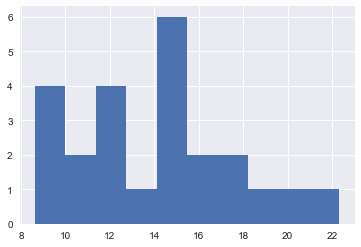

In [38]:
#Plot histogram of congruent times
plt.hist(data.Congruent, bins=10);

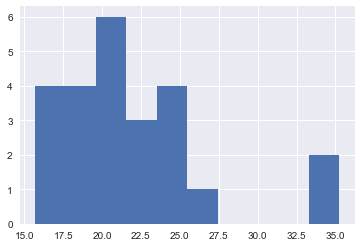

In [39]:
#Plot histogram of incongruent times
plt.hist(data.Incongruent, bins=10);